<a href="https://colab.research.google.com/github/amlan95/Airbnb-Booking-Analysis-Capstone-Project/blob/main/Airbnb_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = ('/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv')
df = pd.read_csv(path)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.shape

(48895, 16)

# Data Cleaning and Wrangling

In [6]:
# checking if there is any NaN values in the dataset.
# and replacing all null type values with zero.
df.isnull().sum()
df.fillna(0, inplace=True)
df.isnull().any()

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
# df.drop(columns=['id','name'])

In [9]:
# checking for duplicated values in dataset.
df.duplicated().sum()

0

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
# 
df[['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327
std,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [12]:
# importing plotly express for better interactive data visualization.
import plotly.express as px


In [13]:

fig = px.sunburst(df, path=['neighbourhood_group'], values='number_of_reviews', color='price' ,color_continuous_scale='RdBu')
fig.update_layout( title = {'text':'Neighbourhood Hotel Price', 'y':0.98,'x':0.5,'xanchor':'center', 'yanchor':'top'})
fig.show()

In [37]:
# median price listing by neghbourhood group
median_price = df.groupby('neighbourhood_group')['price'].agg('median').sort_values(ascending= False)
np.round(median_price, 2)

neighbourhood_group
Manhattan        150.0
Brooklyn          90.0
Queens            75.0
Staten Island     75.0
Bronx             65.0
Name: price, dtype: float64

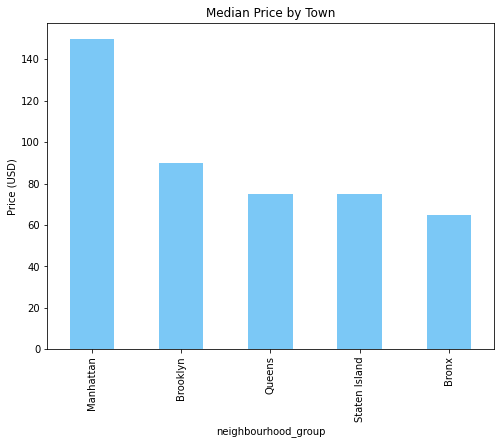

In [15]:
median_price.plot(kind='bar', title = "Median Price by Town", figsize=(8,6), color = '#7BC8F6')
plt.xlabel('neighbourhood_group')
plt.ylabel('Price (USD)')
plt.show()

In [16]:
price_room_type = df.groupby('room_type')['price'].agg('median').sort_values(ascending= False)
np.round(price_room_type, 2)

room_type
Entire home/apt    160.0
Private room        70.0
Shared room         45.0
Name: price, dtype: float64

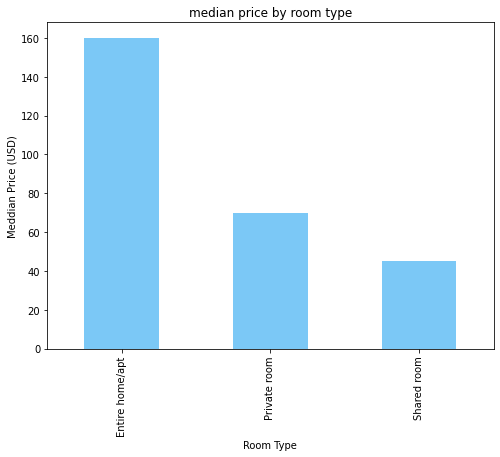

In [17]:
price_room_type.plot(kind='bar',title='median price by room type', figsize=(8,6), color = '#7BC8F6')
plt.xlabel('Room Type')
plt.ylabel('Meddian Price (USD)')
plt.show()

In [18]:
top_neighbourhood = df.groupby('neighbourhood')['price'].agg('median').nlargest(15).sort_values(ascending= True)
df_top = top_neighbourhood.head(15)

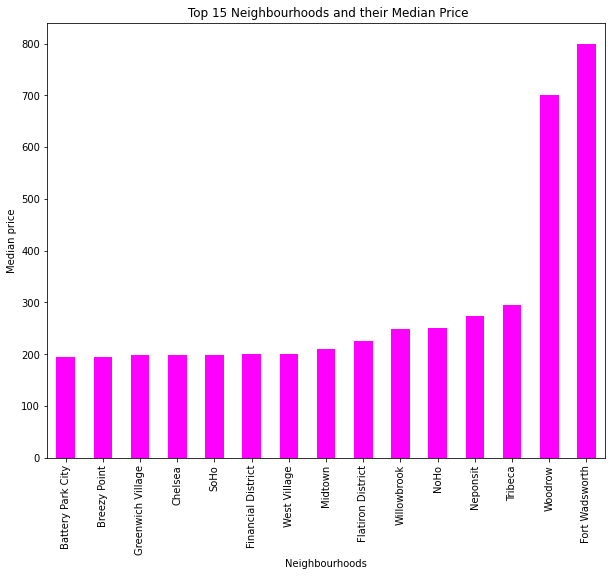

In [19]:
df_top.plot(kind='bar', title=' Top 15 Neighbourhoods and their Median Price', figsize=(10,8), color= 'magenta')
plt.xlabel('Neighbourhoods')
plt.ylabel('Median price')
plt.show()

In [42]:
plot = px.box(data_frame=df,
       x='neighbourhood_group',
       y='availability_365',
       points='suspectedoutliers',
       title='Neighbour Availability')
plot.show()

In [21]:
df['name']

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [22]:
top_host= df.name.value_counts().head(10)
top_host

Hillside Hotel                                18
Home away from home                           17
0                                             16
New york Multi-unit building                  16
Brooklyn Apartment                            12
Private Room                                  11
Loft Suite @ The Box House Hotel              11
Private room                                  10
Artsy Private BR in Fort Greene Cumberland    10
Beautiful Brooklyn Brownstone                  8
Name: name, dtype: int64

In [23]:
hosts= df.groupby('host_id')['calculated_host_listings_count'].agg('max').sort_values( ascending = False).reset_index().head(10)
# hosts.sort_values(hosts['calculated_host_listings_count'], ascending = False)
hosts

,host_id,calculated_host_listings_count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


In [24]:
check = df.calculated_host_listings_count.max()
check

327

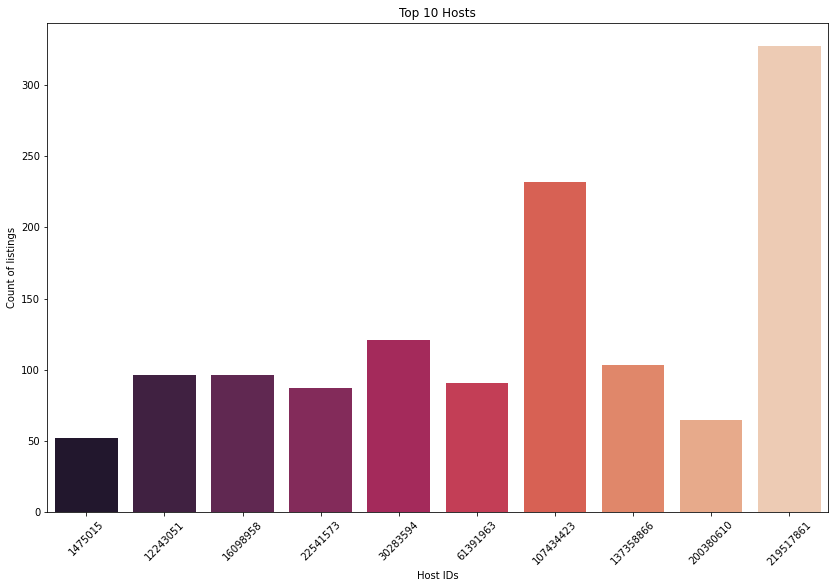

In [25]:
plt.figure(figsize=(14,9))
top=sns.barplot(x="host_id", y="calculated_host_listings_count", data=hosts, palette='rocket')
top.set_title('Top 10 Hosts')
top.set_ylabel('Count of listings')
top.set_xlabel('Host IDs')
top.set_xticklabels(top.get_xticklabels(), rotation=45)

plt.show()

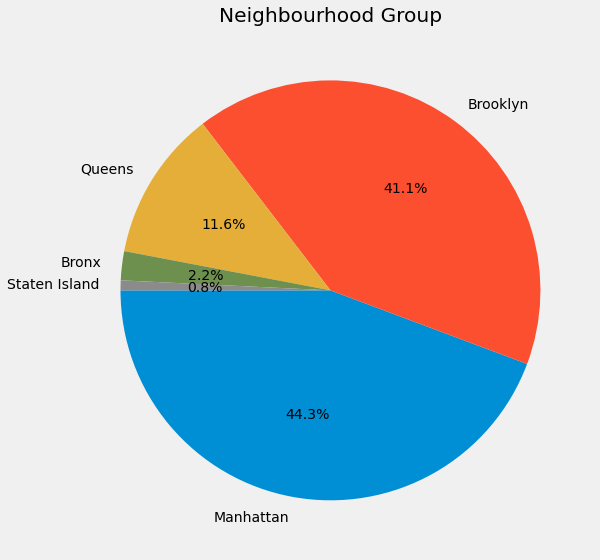

In [66]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,9))
plt.title("Neighbourhood Group")
pie_chart = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

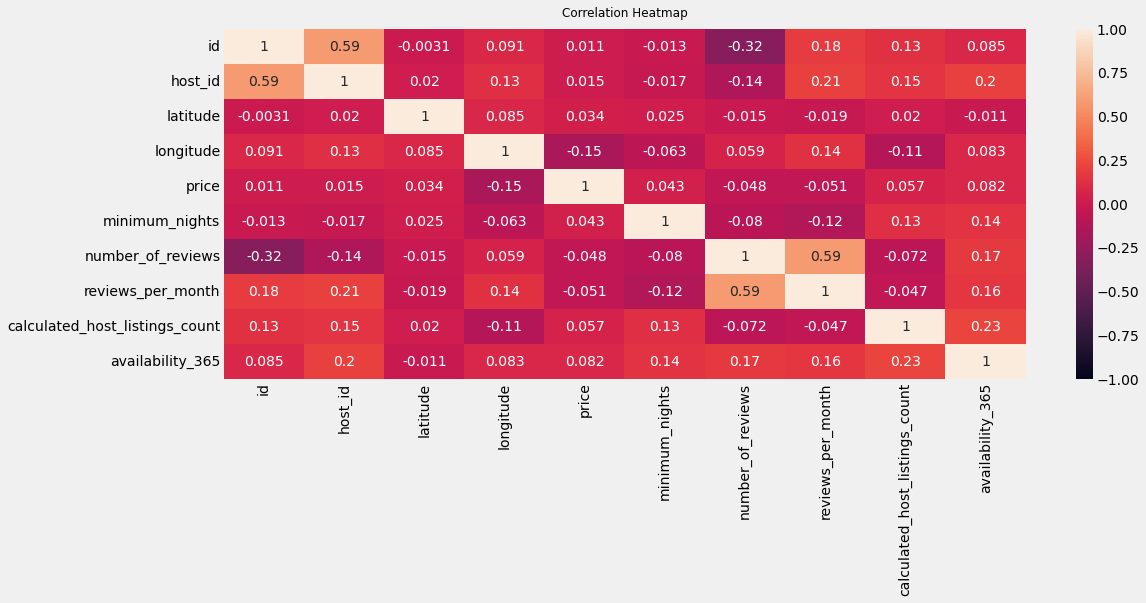

In [27]:
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [44]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [65]:
fig = px.scatter(df, x='longitude', y='latitude', color='neighbourhood_group',
           size='price' ,title='neighbour hood group and their room availability', 
           range_color=[0,150], hover_data=['availability_365'], width=1200, height=800)
fig.layout.template = 'plotly_dark'
fig.show()

In [28]:
import folium

from folium import plugins

from folium.plugins import HeatMap
from scipy.stats import pearsonr


In [29]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 6.3 MB 31.2 MB/s 
     |████████████████████████████████| 16.7 MB 302 kB/s 


In [30]:
import geopandas

In [67]:
hosts_view= df.groupby('host_id')['calculated_host_listings_count'].agg('max').sort_values( ascending = False).reset_index().head(80)
# hosts.sort_values(hosts['calculated_host_listings_count'], ascending = False)
hosts_view

,host_id,calculated_host_listings_count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
...,...,...
75,16677326,12
76,96098402,12
77,137274917,12
78,65809485,12


In [31]:
geometry = geopandas.points_from_xy(df.longitude, df.latitude)
geo_df = geopandas.GeoDataFrame(df['neighbourhood'], geometry=geometry)


In [69]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [68]:
hotel_map = folium.Map(location=[40.767937,-73.982155 ],tiles='OpenStreetMap', zoom_start=12)
location = ['latitude','longitude']
loc_view = hosts_view[location]
HeatMap(loc_view.dropna(),radius=8,gradient={.4: 'blue', .65: 'lime', 1: 'red'}).add_to(hotel_map)
# plugins.HeatMap(df['number_of_reviews'],radius=8,gradient={.4: 'blue', .65: 'lime', 1: 'red'}).add_to(hotel_map)
hotel_map

KeyError: ignored